In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import seaborn as sns
import string
import re
import warnings
import nltk
import numpy as np

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Read the dataset
url='/content/drive/MyDrive/fake_or_real_news.csv'
df=pd.read_csv(url)

In [ ]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   6335 non-null   object
 1   text    6335 non-null   object
 2   label   6335 non-null   object
dtypes: object(3)
memory usage: 148.6+ KB


In [ ]:
df.isnull().sum()

,0
title,0
text,0
label,0


In [ ]:
## Drop null values
news=df.dropna()

In [ ]:
news.isna().sum()

,0
title,0
text,0
label,0


In [ ]:
print("Shape of the data set before drop the null values" + " " + str(df.shape))
print("Shape of the data set After drop the null values" + " " + str(news.shape))

Shape of the data set before drop the null values (6335, 3)
Shape of the data set After drop the null values (6335, 3)


In [ ]:
## Reset the index of the data set aftrer drop the null values
news.reset_index(inplace=True)

In [ ]:
news['text'][0]

'Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leadership is being warned that the entir

In [ ]:
print("unreliable of the data set is"+ " "+str(news.label.value_counts()[1]))
print("reliable of the data set is"+ " "+str(news.label.value_counts()[0]))

unreliable of the data set is 3164
reliable of the data set is 3171


<ipython-input-15-f137609e4f40>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("unreliable of the data set is"+ " "+str(news.label.value_counts()[1]))
<ipython-input-15-f137609e4f40>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("reliable of the data set is"+ " "+str(news.label.value_counts()[0]))


Text(0.5, 1.0, 'Reliable vs Unreliable Distribution')

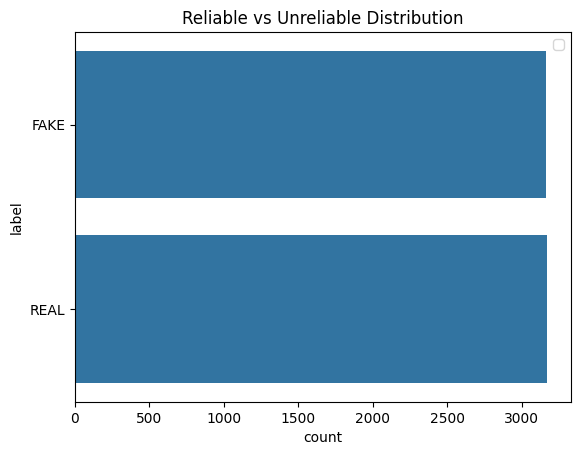

In [ ]:
# True vs Non True News Distribution
sns.countplot(news.label)
plt.legend()
plt.title("Reliable vs Unreliable Distribution")

In [ ]:
news.label.value_counts()[0]

<ipython-input-17-df973e89bbb4>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  news.label.value_counts()[0]


3171

In [ ]:
#Describe about ham and Spam Mail Behavior in all data set
news.groupby ('label').describe()

index                                                                 
        count         mean          std  min      25%     50%      75%     max
label                                                                         
FAKE   3164.0  3166.358723  1846.391647  0.0  1562.75  3129.5  4786.25  6332.0
REAL   3171.0  3167.639861  1811.572295  2.0  1604.50  3200.0  4721.50  6334.0

In [ ]:
# Reliable of news
news[news.label == 'REAL'].describe()

,index
count,3171.000000
mean,3167.639861
std,1811.572295
min,2.000000
25%,1604.500000
50%,3200.000000
75%,4721.500000
max,6334.000000


In [ ]:
# UnReliable of news
news[news.label == 'FAKE'].describe()

,index
count,3164.000000
mean,3166.358723
std,1846.391647
min,0.000000
25%,1562.750000
50%,3129.500000
75%,4786.250000
max,6332.000000


In [ ]:
#Find word length of each news
news['Word_length']=news.text.apply(lambda x:len(x.split()))

In [ ]:
news.head()

,index,title,text,label,Word_length
0,0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,1296
1,1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,446
2,2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,431
3,3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,404
4,4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,317


In [ ]:
print("Reliable(Real news) news  length description : "+ "\n"+str(news[news['label']=='REAL'].describe()))
print("Unreliable(Fake) news  length description :"+ "\n"+str(news[news['label']=='FAKE'].describe()))

Reliable(Real news) news  length description : 
             index  Word_length
count  3171.000000  3171.000000
mean   3167.639861   873.257647
std    1811.572295   722.483569
min       2.000000     7.000000
25%    1604.500000   450.500000
50%    3200.000000   771.000000
75%    4721.500000  1123.000000
max    6334.000000  7602.000000
Unreliable(Fake) news  length description :
             index   Word_length
count  3164.000000   3164.000000
mean   3166.358723    679.129267
std    1846.391647    958.962790
min       0.000000      0.000000
25%    1562.750000    212.000000
50%    3129.500000    421.000000
75%    4786.250000    830.000000
max    6332.000000  20891.000000


Text(0.5, 1.0, 'Reliable news length distribution')

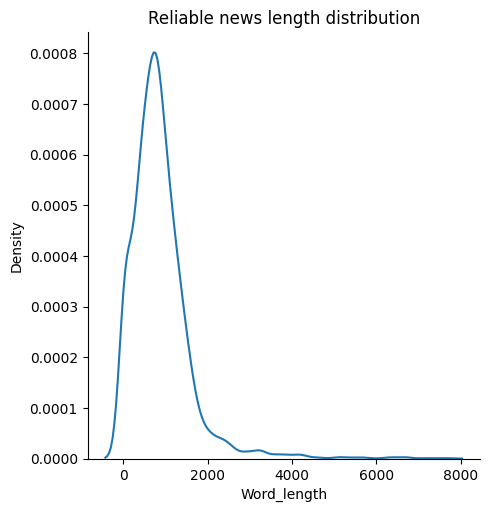

In [ ]:
sns.displot(news[news.label=='REAL'].Word_length,kind='kde')
sns.set_style(style='whitegrid')
plt.title("Reliable news length distribution")

Text(0.5, 1.0, 'Uneliable news length distribution')

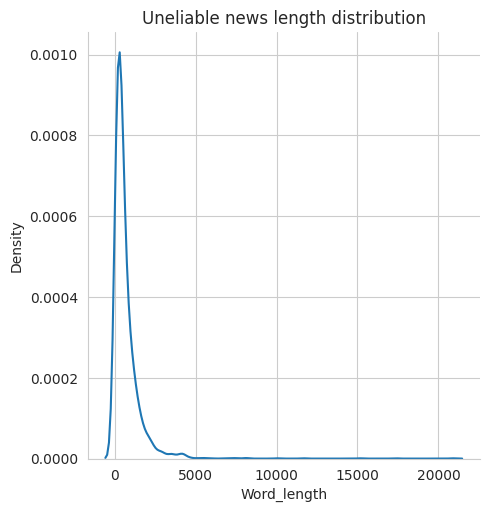

In [ ]:
sns.displot(news[news.label=='FAKE'].Word_length,kind='kde')
sns.set_style(style='whitegrid')
plt.title("Uneliable news length distribution")

In [ ]:
pip install text-hammer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 11.6 MB/s eta 0:00:00
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.12.3
    Uninstalling beautifulsoup4-4.12.3:
      Successfully uninstalled beautifulsoup4-4.12.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yfinance 0.2.50 requires beautifulsoup4>=4.11.1, but you have beautifulsoup4 4.9.1 which is incompatible.


In [ ]:
import text_hammer as th
from tqdm.notebook import tqdm

def text_preprocessing(df, col_name):
    # فعال کردن نمایش tqdm برای pandas
    tqdm.pandas()

    # اعمال پردازش‌ها به ستون مشخص‌شده
    df[col_name] = df[col_name].progress_apply(lambda x: str(x).lower())
    df[col_name] = df[col_name].progress_apply(lambda x: th.cont_exp(x))  # تبدیل اختصارات
    df[col_name] = df[col_name].progress_apply(lambda x: th.remove_emails(x))  # حذف ایمیل‌ها
    df[col_name] = df[col_name].progress_apply(lambda x: th.remove_html_tags(x))  # حذف تگ‌های HTML
    df[col_name] = df[col_name].progress_apply(lambda x: th.remove_stopwords(x))  # حذف stopwords
    df[col_name] = df[col_name].progress_apply(lambda x: th.spelling_correction(x))  # اصلاح املایی
    df[col_name] = df[col_name].progress_apply(lambda x: th.remove_special_chars(x))  # حذف کاراکترهای خاص
    df[col_name] = df[col_name].progress_apply(lambda x: th.remove_accented_chars(x))  # حذف لهجه‌ها
    df[col_name] = df[col_name].progress_apply(lambda x: th.make_base(x))  # کاهش به ریشه کلمه

    return df

# فراخوانی تابع برای پردازش ستون "text" و ذخیره نتیجه در ستون "cleaned_text"
news['cleaned_text'] = text_preprocessing(news, "text")

  0%|          | 0/6335 [00:00<?, ?it/s]

  0%|          | 0/6335 [00:00<?, ?it/s]

  0%|          | 0/6335 [00:00<?, ?it/s]

  0%|          | 0/6335 [00:00<?, ?it/s]

  0%|          | 0/6335 [00:00<?, ?it/s]

  0%|          | 0/6335 [00:00<?, ?it/s]

In [ ]:
import nltk
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Ensure you have the required NLTK data
nltk.download('stopwords')
nltk.download('punkt')

ps = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # 1. Remove non-alphabetical characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()

    # 2. Tokenize the text
    tokens = word_tokenize(text)

    # 3. Remove stopwords and apply stemming
    tokens = [ps.stem(word) for word in tokens if word not in stop_words]

    # 4. Join back into a single string
    return ' '.join(tokens)

# Apply the function to your corpus
corpus = [preprocess_text(text) for text in news['text']]


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#Convert corpus to array
import numpy as np
news['cleaned_text']=np.array(corpus)

In [ ]:
news['Word_length']=news.cleaned_text.apply(lambda x:len(x.split()))

In [ ]:
news.head()

,index,title,text,label,Word_length,cleaned_text
0,0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,670,daniel greenfield shillman journal fellow free...
1,1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,240,googl pinterest digg linkedin reddit stumbleup...
2,2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,241,u secretari state john f kerri said monday sto...
3,3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,243,kayde king kaydeek novemb lesson tonight dem l...
4,4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,178,primari day new york front runner hillari clin...


In [ ]:
#Seperate Fake news
unreliable=list(news[news['label']=='FAKE']['cleaned_text'])

In [ ]:
#tokenize
from nltk.tokenize import word_tokenize
all_word_unreliable=[]
for sentence in unreliable:
    words=word_tokenize(sentence)
    for word in words:
        all_word_unreliable.append(word)

In [ ]:
from collections import Counter
counter_unreliable=Counter(all_word_unreliable)
print(counter_unreliable.most_common(20))
coun_unreliable=pd.DataFrame(counter_unreliable.most_common(20))
coun_unreliable.columns=['Common_Words','count']
coun_unreliable.style.background_gradient(cmap='Blues')
coun_unreliable

[('clinton', 7178), ('trump', 6793), ('state', 5637), ('peopl', 5558), ('one', 5455), ('us', 5191), ('would', 4923), ('hillari', 4602), ('elect', 4289), ('like', 4224), ('time', 4196), ('year', 4108), ('said', 4009), ('american', 3775), ('new', 3525), ('use', 3259), ('govern', 3231), ('world', 3217), ('also', 3195), ('presid', 3189)]


,Common_Words,count
0,clinton,7178
1,trump,6793
2,state,5637
3,peopl,5558
4,one,5455
5,us,5191
6,would,4923
7,hillari,4602
8,elect,4289
9,like,4224


In [ ]:
##Plot Most Common words that appeared in mail
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
fig = px.bar(coun_unreliable, x="count", y="Common_Words", title='Commmon Words in Fake News', orientation='h',
             width=700, height=700,color="Common_Words")
fig.show()

In [ ]:
from wordcloud import WordCloud,STOPWORDS
##Define function for Plot Word Cloud
def plot_wordcloud(text):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u', "im",'mr'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(max_font_size=200,width=600, height=400).generate(str(text))
# Open a plot of the generated image.

    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title('WordCloud of spam mail')
    plt.show()

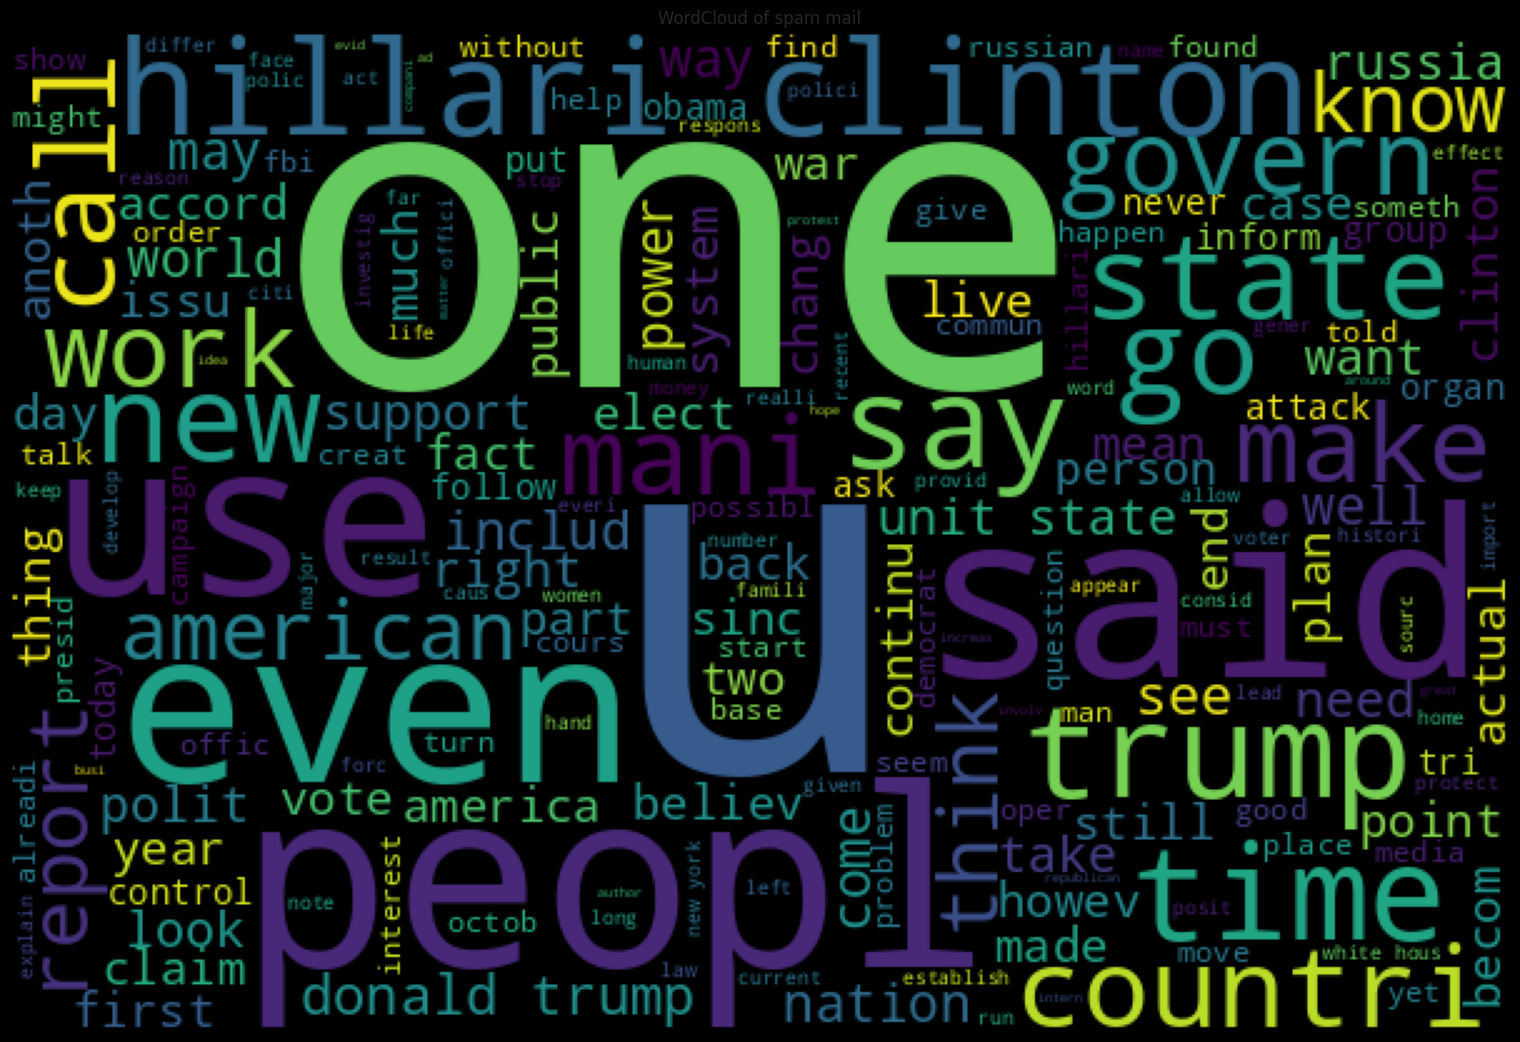

In [ ]:
plot_wordcloud(unreliable)

In [ ]:
## Seperate Reliable news message
reliable=list(news[news['label']=='REAL']['cleaned_text'])

In [ ]:
#Reliable  mail words
from nltk.tokenize import word_tokenize
all_word_reliable=[]
for sentence in reliable:
    words=word_tokenize(sentence)
    for word in words:
        all_word_reliable.append(word)

In [ ]:
from collections import Counter
counter_reliable=Counter(all_word_reliable)
print(counter_reliable.most_common(20))
coun_reliable=pd.DataFrame(counter_reliable.most_common(20))
coun_reliable.columns=['Common_Words','count']
coun_reliable.style.background_gradient(cmap='Blues')
coun_reliable

[('said', 17203), ('trump', 15746), ('clinton', 10898), ('state', 10309), ('republican', 8199), ('would', 7859), ('presid', 6952), ('one', 6946), ('say', 6650), ('peopl', 6320), ('campaign', 6293), ('obama', 5979), ('year', 5928), ('democrat', 5851), ('new', 5810), ('like', 5490), ('time', 5304), ('parti', 5107), ('also', 5030), ('polit', 4849)]


,Common_Words,count
0,said,17203
1,trump,15746
2,clinton,10898
3,state,10309
4,republican,8199
5,would,7859
6,presid,6952
7,one,6946
8,say,6650
9,peopl,6320


In [ ]:
##Plot Most Common words that appeared in mail
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
fig = px.bar(coun_reliable, x="count", y="Common_Words", title='Commmon Words in Real News', orientation='h',
             width=700, height=700,color="Common_Words")
fig.show()

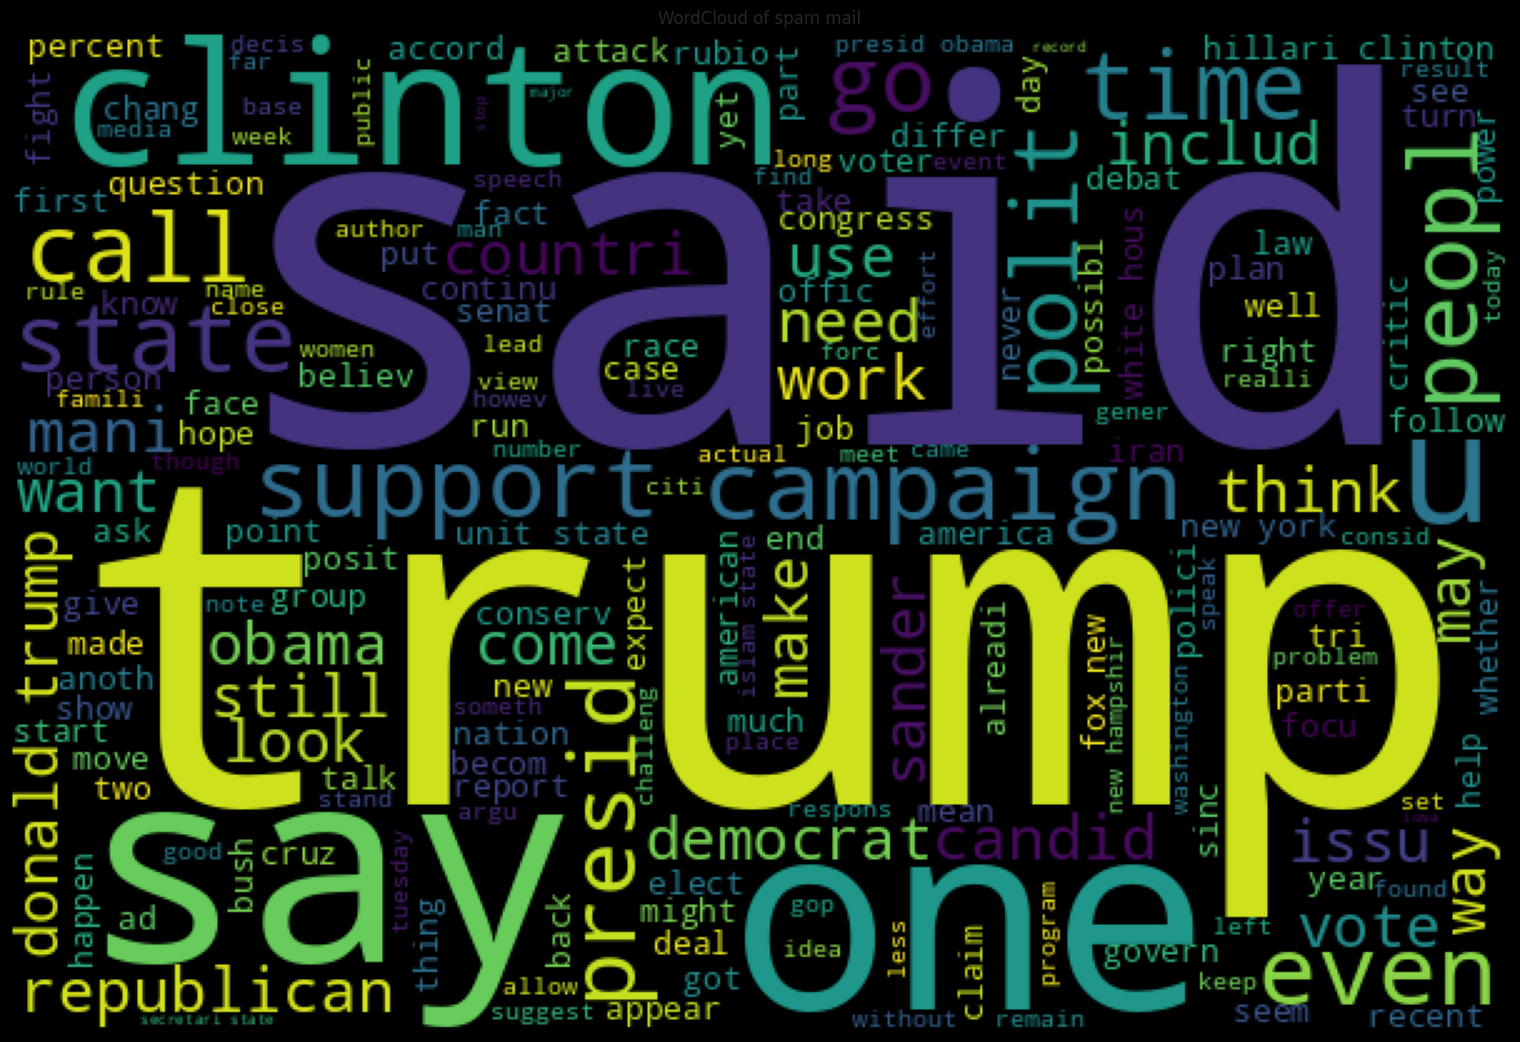

In [ ]:
#For ploting use created function
plot_wordcloud(reliable)

In [ ]:
#Applying Countvectorizer
#Creating the Bag Of Words model
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
cv=CountVectorizer(max_features=3500,ngram_range=(1,3))

In [ ]:
x=cv.fit_transform(corpus).toarray()

In [ ]:
print(x.shape)

(6335, 3500)


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Bidirectional,Embedding,Dropout
from tensorflow.keras.layers import Dropout
from tensorflow.keras import activations

In [ ]:
x=news['cleaned_text']
y=news['label']

In [ ]:
import keras
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

In [ ]:
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
print("Vocab size : ",vocab_size)

Vocab size :  43749


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# تبدیل مقادیر متنی به مقادیر عددی
label_encoder = LabelEncoder()
news['label'] = label_encoder.fit_transform(news['label'])

# تقسیم داده‌ها به مجموعه آموزش و تست
x_train, x_test, y_train, y_test = train_test_split(
    news['cleaned_text'],
    news['label'],
    test_size=0.2,
    stratify=news['label'],
    random_state=100
)


In [ ]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=model_selection.train_test_split(news['cleaned_text'],news['label'].astype(int),test_size=0.2,stratify=news['label'],random_state=100)


In [ ]:
X_train_ =tokenizer.texts_to_sequences(x_train)
X_train_pad=pad_sequences(X_train_,maxlen=256,padding='post')
X_test_ = tokenizer.texts_to_sequences(x_test)
X_test_pad = pad_sequences(X_test_, maxlen = 256, padding = 'post')

In [ ]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Embedding, Dropout, Dense, Bidirectional, LSTM
import tensorflow as tf
from tensorflow.keras.metrics import Precision, Recall
# مشخصات مدل
EMBEDDING_DIM = 100
VOCAB_SIZE = 10000
INPUT_LENGTH = X_train_pad.shape[1]

# ورودی مدل
inputs = Input(shape=(INPUT_LENGTH,))

# لایه‌های مدل
x = Embedding(input_dim=VOCAB_SIZE, output_dim=EMBEDDING_DIM, input_length=INPUT_LENGTH)(inputs)
x = Dropout(0.2)(x)
x = Bidirectional(LSTM(128, return_sequences=True))(x)
x = Dropout(0.2)(x)
x = Bidirectional(LSTM(256, return_sequences=True))(x)
x = Dropout(0.2)(x)
x = Bidirectional(LSTM(128, return_sequences=False))(x)
outputs = Dense(1, activation='sigmoid')(x)

# ساخت مدل
model = Model(inputs=inputs, outputs=outputs)

# کامپایل مدل
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adamax(),
    metrics=['acc', Precision(name="Precision"), Recall(name="Recall")]
)

# نمایش ساختار مدل
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ embedding (Embedding)                │ (None, 256, 100)            │       1,000,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 256, 256)            │         234,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 256, 512)            │       1,050,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256, 512)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 256)                 │         656,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,941,761 (11.22 MB)

 Trainable params: 2,941,761 (11.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Dense, Bidirectional, LSTM
import tensorflow as tf

EMBEDDING_DIM = 100
model = Sequential()
model.add(Embedding(input_dim=10000,  # اندازه واژگان
                    output_dim=EMBEDDING_DIM,
                    input_length=X_train_pad.shape[1]))  # طول ورودی
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dense(1, activation='sigmoid'))

# کامپایل مدل
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adamax(),
    metrics=['accuracy']
)

# نمایش ساختار مدل
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_4 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_5 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_emd= model.fit(X_train_pad,y_train, epochs = 30, batch_size = 200, validation_data=(X_test_pad, y_test),verbose = 1)


Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 18s 337ms/step - Precision: 0.6085 - Recall: 0.6490 - acc: 0.6163 - loss: 0.6536 - val_Precision: 0.7841 - val_Recall: 0.7792 - val_acc: 0.7822 - val_loss: 0.4825
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 14s 284ms/step - Precision: 0.8213 - Recall: 0.7945 - acc: 0.8106 - loss: 0.4234 - val_Precision: 0.8578 - val_Recall: 0.8281 - val_acc: 0.8453 - val_loss: 0.3721
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 285ms/step - Precision: 0.8950 - Recall: 0.8759 - acc: 0.8861 - loss: 0.2883 - val_Precision: 0.8954 - val_Recall: 0.7965 - val_acc: 0.8516 - val_loss: 0.3573
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 11s 312ms/step - Precision: 0.9284 - Recall: 0.9321 - acc: 0.9276 - loss: 0.1936 - val_Precision: 0.8606 - val_Recall: 0.9054 - val_acc: 0.8792 - val_loss: 0.2986
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 314ms/step - Precision: 0.9457 - Recall: 0.9527 - acc: 0.9486 - loss: 0.1366 - val_Precision: 0.8797 - val_Recall: 0.8880 - val_acc: 0.8832 - val_loss: 0.

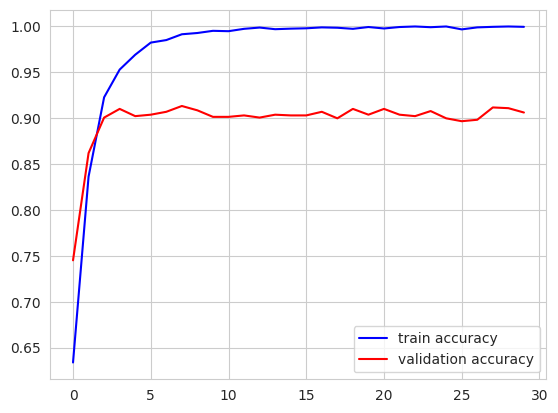

In [ ]:
plt.plot(history_emd.history['acc'],c='b',label='train accuracy')
plt.plot(history_emd.history['val_acc'],c='r',label='validation accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
import numpy as np

# پیش‌بینی احتمالات
pred_probs = model.predict(X_test_pad)

# تبدیل احتمالات به کلاس‌ها
pred = (pred_probs > 0.5).astype("int32")


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step


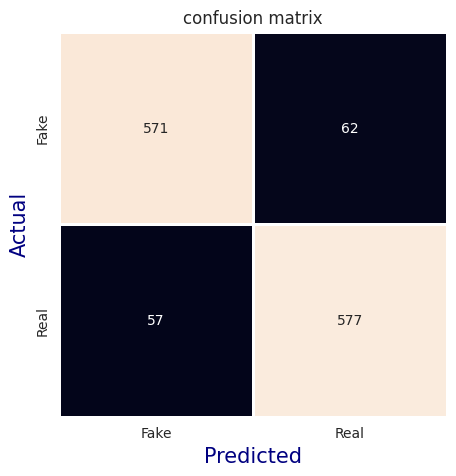

In [ ]:
# plotting graph for confusion matrix
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt='', cbar=False, linewidths=2,
            xticklabels = ['Fake','Real'], yticklabels = ['Fake','Real'])
plt.title('confusion matrix')
plt.xlabel('Predicted', color='navy', fontsize=15)
plt.ylabel('Actual', color='navy', fontsize=15);

In [ ]:
# accuracy of the model we built
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

print("Model Accuracy : ", accuracy)
print("Model Precision: ", precision)
print("Model Recall   : ", recall)
print("Model F1 Score : ", f1)

Model Accuracy :  0.9060773480662984
Model Precision:  0.9029733959311425
Model Recall   :  0.9100946372239748
Model F1 Score :  0.9065200314218381
